In [ ]:
"""
Project Title: u3002080 DST 11523 Assignment1 Part A and Part B

Description:
    This project focuses on importing, understanding, and analyzing restaurant data.
    The analysis involves various plots to understand the distribution of unique
    cuisines, identifying the top 3 suburbs, and debunking the myth that restaurants
    with excellent ratings are mostly very expensive and those with poor ratings
    are rarely expensive.
    
    Further, the project involves extensive exploratory data analysis (EDA) for factors
    like cost, rating, and type of the restaurant. Additionally, a density map of cuisines
    and an interactive map of restaurants are also generated.
    
    The latter part of the project delves into predictive modeling. Feature engineering
    techniques like data cleaning and preprocessing are employed. Two regression models,
    namely `model_regression_1` (linear regression) and `model_regression_2` (gradient
    descent), are built. Their performance is evaluated based on metrics like mean squared
    error (MSE) and R-squared (R2).
    
    The project also touches upon classification tasks, with a logistic regression model 
    (`model_classification_3`) being the primary model. The model's results are analyzed using 
    a confusion matrix. Additionally, three other classification methods are employed, and 
    their performances are discussed.
    
    The project concludes with observations and conclusions regarding the performance of 
    the predictive models used.

Author: Chen Chen
ID: u3002080
Date: 26/09/2023
Version: 1.0
"""

## Part A –Importing and Understanding Data

### 1- Provide plots/graphs to support:

#### o How many unique cuisines are served by Sydney restaurants?
#### o which suburbs (top-3) have the highest number of restaurants?
#### o “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please support your answer by numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text')

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import ast

import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display, clear_output

from itertools import chain

##for II.Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

##for extended questions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
# let us see what data available in our data directory
for direname, _ , filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(direname, filename))

data\sydney.geojson
data\zomato_df_final_data.csv


In [3]:
# load data
data_path = "data/zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

### Exploratory data analysis

In [4]:
# data shape
print(df.shape)
# column names
print(df.columns)

(10500, 17)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


In [5]:
# summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [6]:
# types of variables
# categrical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

There are 10 categorical variables

The categorical variables are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color']


In [7]:
# check if the dataset has any na/null values
df.isnull
print('Are there any missing value? ', df.isnull().values.any())


Are there any missing value?  True


In [8]:
# Get a summary of how many missing values in each variables. 
df.isnull().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [9]:
#Check if there are empty values in cuisines for question 1.
total_missing_count = df[(df['cuisine'].isnull()) | (df['cuisine'].str.strip() == '')].shape[0]
print(f"There are {total_missing_count} values that are either null or empty in the 'cuisine' column.")


There are 0 values that are either null or empty in the 'cuisine' column.


### A.1 How many unique cuisines are served by Sydney restaurants?


In [10]:
unique_cuisines_count = df['cuisine'].nunique()
print(f"There are {unique_cuisines_count} unique cuisines served by the restaurants.")

There are 1759 unique cuisines served by the restaurants.


### A.2  Which suburbs (top-3) have the highest number of restaurants?

In [11]:
top_3_suburbs = df['subzone'].value_counts().head(3)
print("The top 3 suburbs with highest number of restaurants")
print(top_3_suburbs)


The top 3 suburbs with highest number of restaurants
CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64


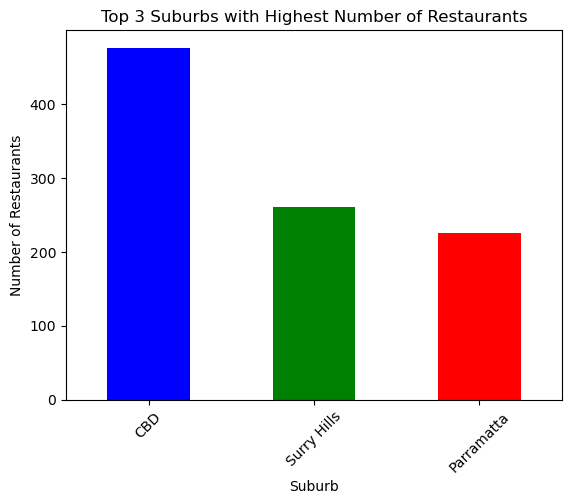

In [12]:
# Plot the top 3 suburbs
top_3_suburbs.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Top 3 Suburbs with Highest Number of Restaurants')
plt.ylabel('Number of Restaurants')
plt.xlabel('Suburb')
plt.xticks(rotation=45)
plt.show()


###  “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please support your answer by numbers and visuals. (hint: use stacked bar chart or histogram to relate ‘cost’ to 'rating_text')

In [13]:
# Define 'expensive'. For this example, we'll use the 75th percentile that is threshold for expensive.
expensive_threshold = df['cost'].quantile(0.75)
expensive_threshold

60.0

In [14]:
# Filter restaurants with 'excellent' rating
df_excellent = df[df['rating_text'] == 'Excellent']
# Calculate proportion of 'expensive' restaurants among 'excellent' rated ones
percentage_expensive_excellent = (df_excellent['cost'] > expensive_threshold).mean()


In [15]:
# Filter restaurants with 'poor' rating
df_poor = df[df['rating_text'] == 'Poor']
# Calculate proportion of 'expensive' restaurants among 'poor' rated ones
percentage_expensive_poor = (df_poor['cost'] > expensive_threshold).mean()

In [16]:
print(f"Percentage of 'excellent' rated restaurants that are expensive: {percentage_expensive_excellent*100:.2f}% ")
print(f"Percentage of 'poor' rated restaurants that are expensive: {percentage_expensive_poor*100:.2f}%")

Percentage of 'excellent' rated restaurants that are expensive: 49.02% 
Percentage of 'poor' rated restaurants that are expensive: 27.27%


In [17]:
correlation_coefficient = df['rating_number'].corr(df['cost'])

print(f"The correlation coefficient between rating_number and cost is: {correlation_coefficient:.2f}")


The correlation coefficient between rating_number and cost is: 0.23


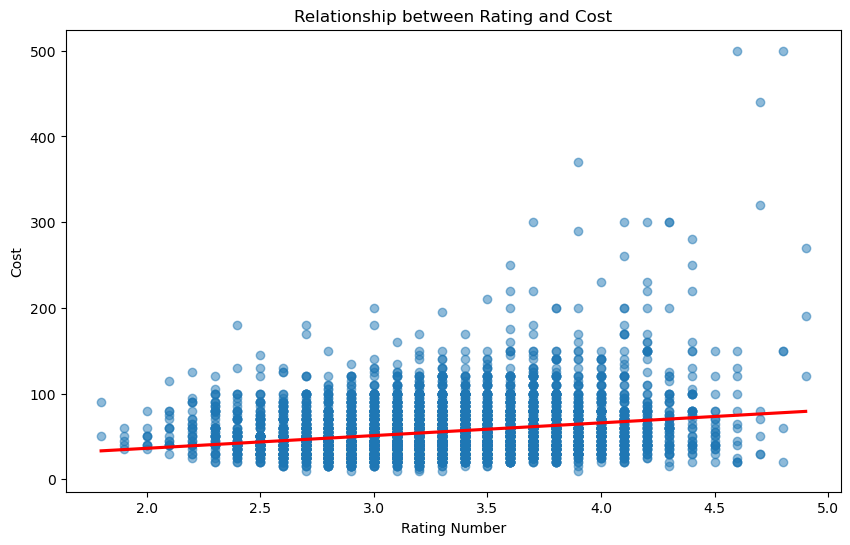

In [18]:
# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='rating_number', y='cost', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship between Rating and Cost')
plt.xlabel('Rating Number')
plt.ylabel('Cost')
plt.show()

#### This plot above shows individual restaurants as dots, and the regression line will give a visual representation of the overall trend in the data. 
So, if the red line slopes upwards, it indicates a positive relationship between rating and cost. The steeper the slope, the stronger the relationship.
As we can see from the slope, it is flatter, therefore, it has positive relationship, but the relationship is weak. 

#### From all observartions above, in conclusion, I do not agree with the statement that "Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive"

For the following reasons: 
1. Percentage:

49% of 'excellent' rated restaurants are considered expensive. It is not "Mostly" as statement suggested
Only 27% of 'poor' rated restaurants are considered expensive. It is not "rarely" as statement suggested.

2. Correlation:

A correlation coefficient of 0.23 indicates a weak positive relationship between rating number and cost. This suggests in general, when the rating of a restaurant increases, its cost tends to increase, but the relationship is weak.

**In conclusion:**
The data shows that restaurants with 'excellent' ratings are more likely to be expensive than those with 'poor' ratings, but the relationship is not as same as the statement might suggest. 

The statement, “Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive,”, even data shows a higher percentage of 'excellent' rated restaurants are expensive compared to 'poor' rated ones, it's not a mostly (only 49%). Also, 27% of 'poor' rated restaurants being expensive can not be considered "rarely."

The correlation also supports this observation, showing a weak positive relationship between rating and cost.


### 2- Perform exploratory analysis for the variables of the data. This can be done by producing histograms and distribution plots and descriptive insights about these variables. This can be performed at least for the following variables.
o Cost
o Rating
o Type

In [19]:
# overview by descriptive stat for 3 columns
print(df[['cost', 'rating_number']].describe())

print("\nType value counts:")
print(df['type'].value_counts())

               cost  rating_number
count  10154.000000    7184.000000
mean      51.153240       3.283672
std       27.799485       0.454580
min        8.000000       1.800000
25%       30.000000       3.000000
50%       45.000000       3.300000
75%       60.000000       3.600000
max      500.000000       4.900000

Type value counts:
['Casual Dining']                    4854
['Café']                             2767
['Fast Food']                         557
['Food Court']                        480
['Pub']                               284
                                     ... 
['Club', 'Casual Dining']               1
['Dessert Parlour', 'Fast Food']        1
['Dessert Parlour', 'Food Court']       1
['Club', 'Pub']                         1
['Food Court', 'Beverage Shop']         1
Name: type, Length: 66, dtype: int64


#### o Cost

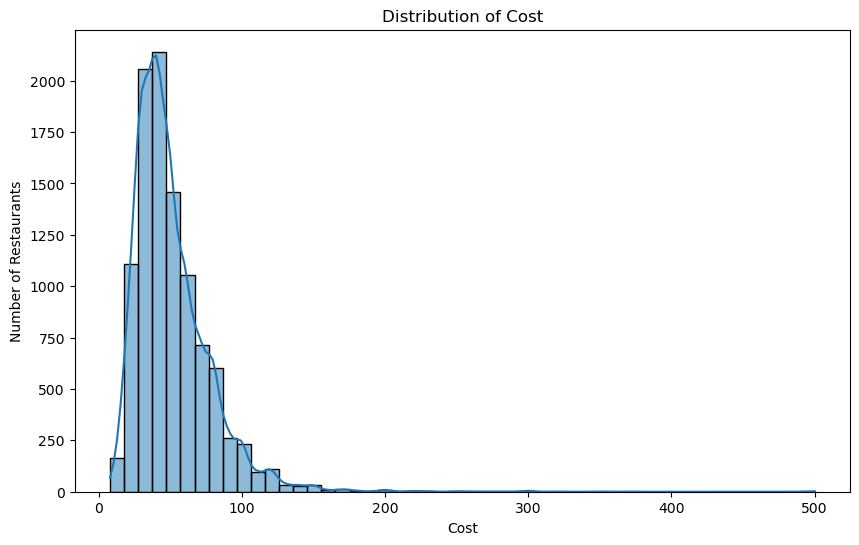

In [20]:
#plot the distribution of cost by histgram
plt.figure(figsize=(10,6))
sns.histplot(df['cost'], kde=True, bins=50)
plt.title("Distribution of Cost")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.show()

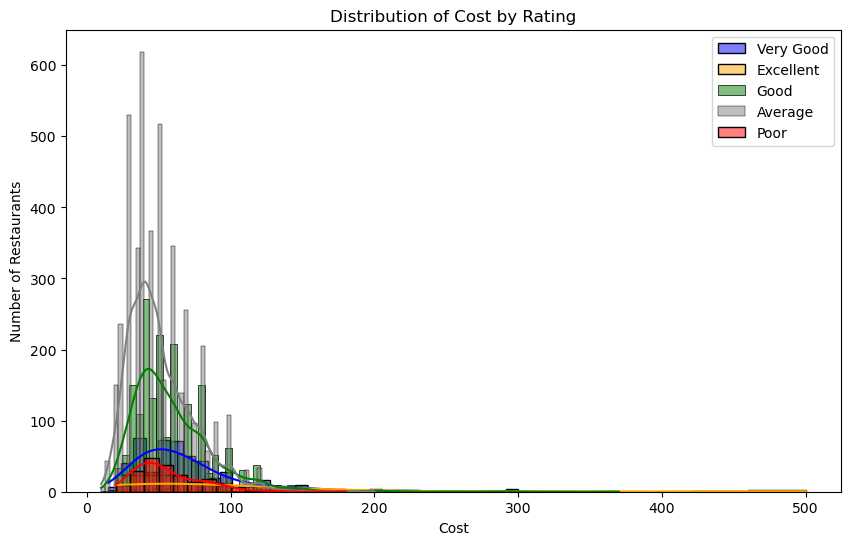

In [21]:
#have a look by different rating
plt.figure(figsize=(10,6))

ratings = df['rating_text'].unique()
colors = {"Poor": "red", "Average": "grey", "Good": "green", "Very Good": "blue","Excellent": "orange"}

for rating in ratings:
    subset = df[df['rating_text'] == rating]
    sns.histplot(subset['cost'], kde=True, label=rating, color=colors.get(rating))

plt.title("Distribution of Cost by Rating")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.legend()  
plt.show()


#### o Rating

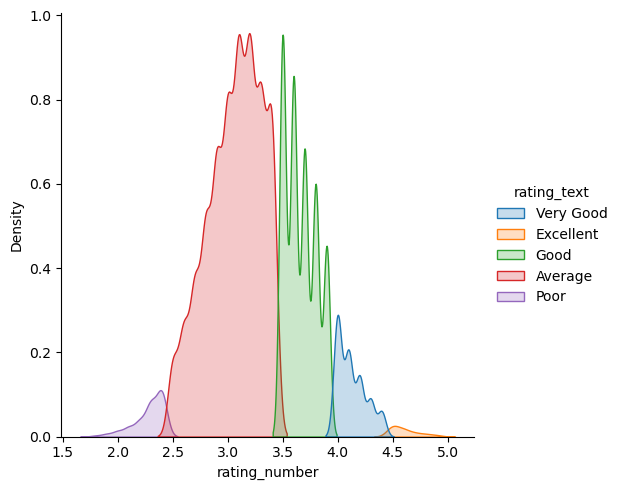

In [22]:
sns.displot(df, x="rating_number",hue="rating_text", kind="kde", fill=True)

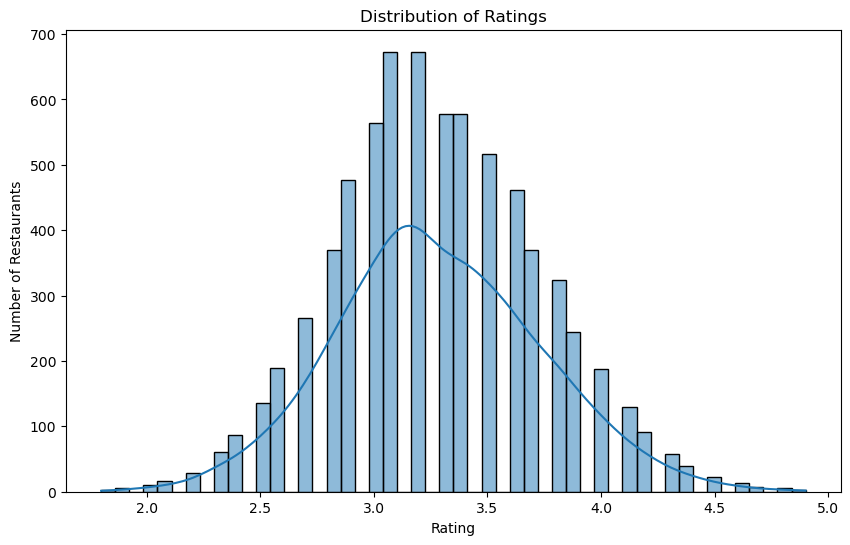

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['rating_number'], kde=True, bins=50)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()


#### o Type

In [24]:
unique_type_count = df['type'].nunique()
print(f"Number of unique values in 'type' column: {unique_type_count}")


Number of unique values in 'type' column: 66


#### there are lot of unique values, will be hard to display in plot

In [25]:
print(df['type'].value_counts())

['Casual Dining']                    4854
['Café']                             2767
['Fast Food']                         557
['Food Court']                        480
['Pub']                               284
                                     ... 
['Club', 'Casual Dining']               1
['Dessert Parlour', 'Fast Food']        1
['Dessert Parlour', 'Food Court']       1
['Club', 'Pub']                         1
['Food Court', 'Beverage Shop']         1
Name: type, Length: 66, dtype: int64


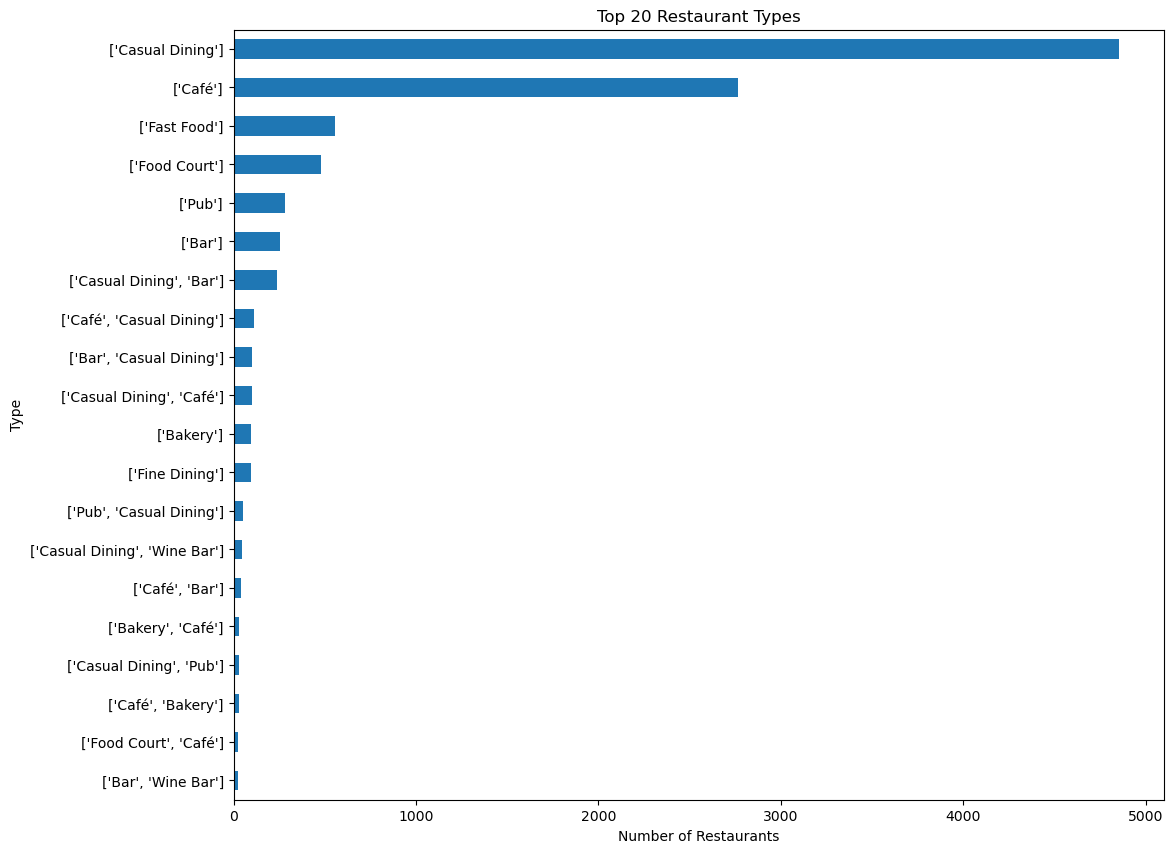

In [26]:
top_n = 20

plt.figure(figsize=(12,10))
df['type'].value_counts().head(top_n)[::-1].plot(kind='barh')
plt.title(f"Top {top_n} Restaurant Types")
plt.ylabel("Type")
plt.xlabel("Number of Restaurants")
plt.show()


### 3- Produce Cuisine Density Map: Using the restaurant geographic information and the provided “sydney.geojson” file, write a python function to show a cuisine density map where each suburb is colour-coded by the number of restaurants that serve a particular cuisine. This function can be called as: “show_cuisine_densitymap(cuisine='Indian')”.
(Hint: use the spatial join in geopandas)

In [27]:
gdf_sydney = gpd.read_file("data\sydney.geojson")

In [28]:
type(gdf_sydney)

geopandas.geodataframe.GeoDataFrame

In [29]:
gdf_sydney

SSC_CODE                               SSC_NAME CONF_VALUE      SQKM  \
0      10001                             Abbotsbury  Very good  4.984673   
1      10002                       Abbotsford (NSW)  Very good  1.017855   
2      10010                         Acacia Gardens  Very good  0.946630   
3      10016                                  Airds  Very good  2.380773   
4      10022                             Alexandria  Very good  3.503330   
..       ...                                    ...        ...       ...   
489    89191                     Unclassified (ACT)         NA  0.000000   
490    89494                 No usual address (ACT)         NA       NaN   
491    89797  Migratory - Offshore - Shipping (ACT)         NA       NaN   
492    99494                  No usual address (OT)         NA       NaN   
493    99797   Migratory - Offshore - Shipping (OT)         NA       NaN   

                                              geometry  
0    POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1    POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2    POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3    POLYGON ((150.84000 -34.07817, 150.84077 -34.0...  
4    POLYGON ((151.18603 -33.91660, 151.18562 -33.9...  
..                                                 ...  
489                                               None  
490                                               None  
491                                               None  
492                                               None  
493                                               None  

[494 rows x 5 columns]

In [30]:
len(gdf_sydney)
print('gdf_sydney is a', type(gdf_sydney), 'containing the shapely polygons that define the', len(gdf_sydney), 'restaurants')

gdf_sydney is a <class 'geopandas.geodataframe.GeoDataFrame'> containing the shapely polygons that define the 494 restaurants


#### Spatial join, join 2 geoDf base on their spatial relationship. num res servering a particil 

In [31]:
# Create a copy of the dataframe, to flatten it. 
df_flatten = df.copy()

# Drop rows with missing lat or lng values from df_flatten
df_flatten.dropna(subset=['lat', 'lng'], inplace=True)

# Convert string representation of lists to actual lists
# check each value of cuisine, if it is a string, try to convert it into an actual list. 
df_flatten['cuisine'] = df_flatten['cuisine'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the dataframe on the 'cuisine' column
df_flatten = df_flatten.explode('cuisine').reset_index(drop=True)

In [32]:
df_flatten.head()

address  cost     cuisine  \
0                   371A Pitt Street, CBD, Sydney  50.0     Hot Pot   
1                   371A Pitt Street, CBD, Sydney  50.0  Korean BBQ   
2                   371A Pitt Street, CBD, Sydney  50.0         BBQ   
3                   371A Pitt Street, CBD, Sydney  50.0      Korean   
4   Shop 7A, 2 Huntley Street, Alexandria, Sydney  80.0        Cafe   

         lat                                               link         lng  \
0 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
2 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
3 -33.876059    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
4 -33.910999  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 8318 0406            4.0   Very Good   
2  02 8318 0406            4.0   Very Good   
3  02 8318 0406            4.0   Very Good   
4  02 9699 2225            4.6   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1                                    CBD                   Sydney Madang   
2                                    CBD                   Sydney Madang   
3                                    CBD                   Sydney Madang   
4  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   

                type   votes  groupon    color    cost_2 cuisine_color  
0  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
1  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
2  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
3  ['Casual Dining']  1311.0    False  #e15307  5.243902       #6f706b  
4           ['Café']  3236.0    False  #9c3203  7.560976       #6f706b

In [33]:
df_flatten['cuisine'].unique()

array(['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean', 'Cafe', 'Coffee and Tea',
       'Salad', 'Poké', 'Japanese', 'Modern Australian', 'Thai',
       'Desserts', 'Cantonese', 'Chinese', 'Yum Cha', 'Sushi', 'Ramen',
       'Malaysian', 'Taiwanese', 'Seafood', 'Asian', 'Italian', 'Steak',
       'French', 'Singaporean', 'European', 'Mexican', 'Bar Food',
       'American', 'Burger', 'Lebanese', 'Bakery', 'Grill', 'Pizza',
       'Vietnamese', 'Cuban', 'Latin American', 'Irish', 'Healthy Food',
       'Australian', 'Fusion', 'Patisserie', 'Juices', 'Vegetarian',
       'Japanese BBQ', 'Spanish', 'Dumplings', 'Indonesian', 'Indian',
       'Tapas', 'Turkish', 'Vegan', 'Shanghai', 'Tea', 'Caribbean',
       'Sandwich', 'Fast Food', 'Middle Eastern', 'German',
       'Mediterranean', 'Pho', 'Greek', 'Beverages', 'Kebab',
       'Fish and Chips', 'Moroccan', 'Pakistani', 'Sri Lankan',
       'Pub Food', 'Contemporary', 'Teriyaki', 'Meat Pie', 'Brasserie',
       'Belgian', 'Austrian', 'Hungarian

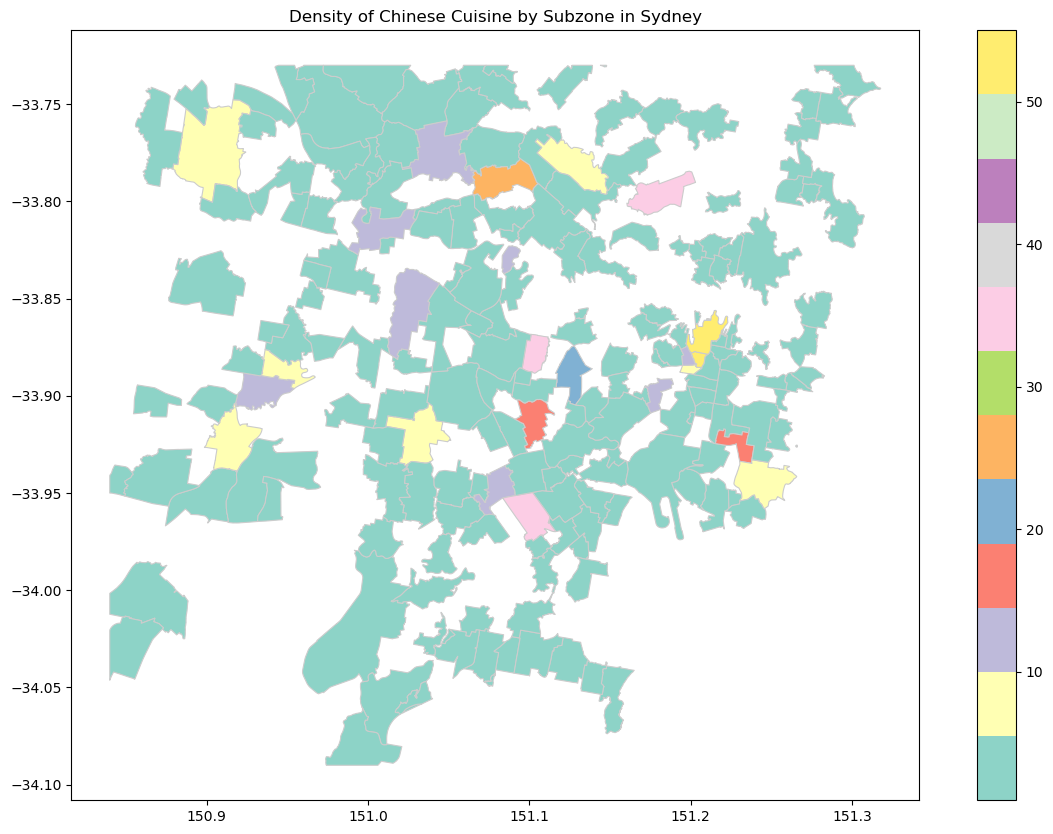

In [34]:

def show_cuisine_densitymap(cuisine='Chinese'):
    # re-Load the geojson file
    #gdf_sydney = gpd.read_file('data/sydney.geojson')
    
    # Convert your dataframe into a GeoDataFrame
    gdf_restaurants = gpd.GeoDataFrame(df_flatten, 
                                       crs="EPSG:4326",
                                       geometry=gpd.points_from_xy(df_flatten.lng, df_flatten.lat))
    
    
    # Filter the dataframe for the specified cuisine, since I have flatten the data, it will be ==
    df_filtered = gdf_restaurants[gdf_restaurants['cuisine']== cuisine]


    # Spatial join: This will count the number of restaurants of the given cuisine in each SSC_NAME
    df_joined = gpd.sjoin(df_filtered, gdf_sydney, predicate='within').groupby('SSC_NAME').size().reset_index(name=f'{cuisine}_count')

    # Merge this with the sydney geo data
    gdf_merged = gdf_sydney.set_index('SSC_NAME').join(df_joined.set_index('SSC_NAME'))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf_merged.plot(column=f'{cuisine}_count', cmap='Set3', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f"Density of {cuisine} Cuisine by Subzone in Sydney")
    plt.show()

show_cuisine_densitymap(cuisine='Chinese')


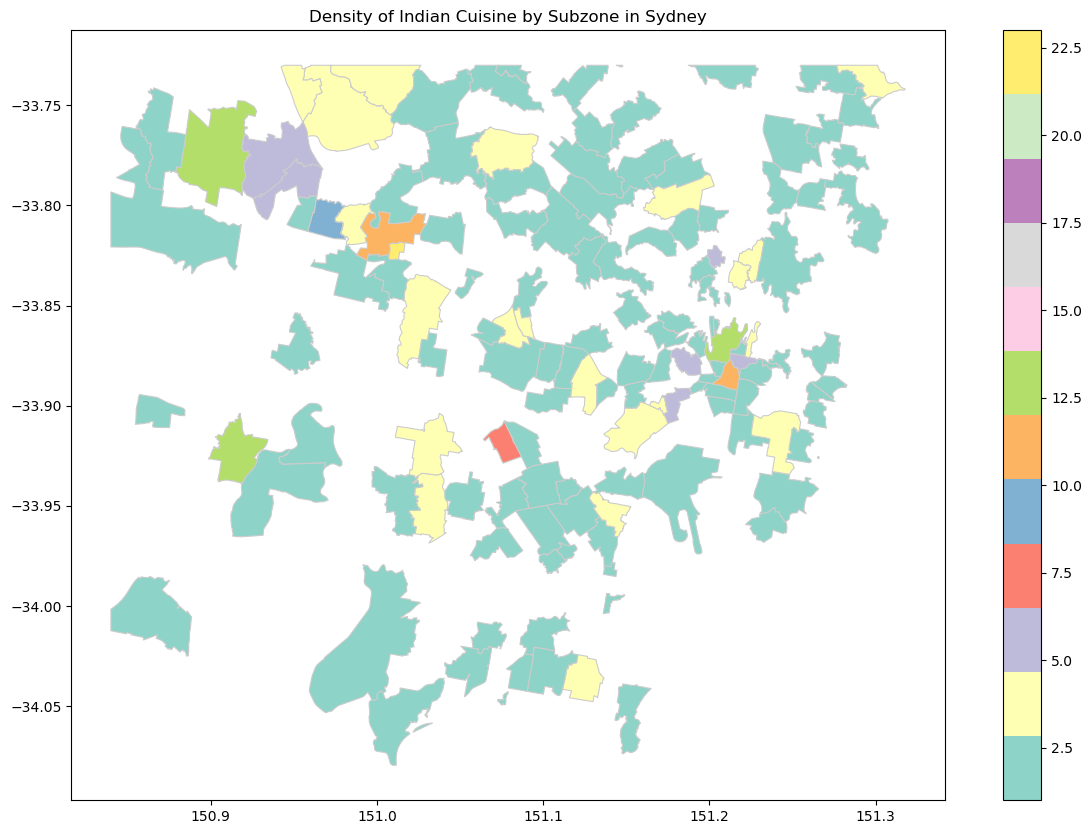

In [35]:
show_cuisine_densitymap(cuisine='Indian')

#### **Bonus: interactive plotting libraries(Bokeh,Plotly)**
Explaine the limitation and how the interactibe libraries will solve it

In [36]:
unique_cuisines = df_flatten['cuisine'].unique()

In [37]:
unique_cuisines

array(['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean', 'Cafe', 'Coffee and Tea',
       'Salad', 'Poké', 'Japanese', 'Modern Australian', 'Thai',
       'Desserts', 'Cantonese', 'Chinese', 'Yum Cha', 'Sushi', 'Ramen',
       'Malaysian', 'Taiwanese', 'Seafood', 'Asian', 'Italian', 'Steak',
       'French', 'Singaporean', 'European', 'Mexican', 'Bar Food',
       'American', 'Burger', 'Lebanese', 'Bakery', 'Grill', 'Pizza',
       'Vietnamese', 'Cuban', 'Latin American', 'Irish', 'Healthy Food',
       'Australian', 'Fusion', 'Patisserie', 'Juices', 'Vegetarian',
       'Japanese BBQ', 'Spanish', 'Dumplings', 'Indonesian', 'Indian',
       'Tapas', 'Turkish', 'Vegan', 'Shanghai', 'Tea', 'Caribbean',
       'Sandwich', 'Fast Food', 'Middle Eastern', 'German',
       'Mediterranean', 'Pho', 'Greek', 'Beverages', 'Kebab',
       'Fish and Chips', 'Moroccan', 'Pakistani', 'Sri Lankan',
       'Pub Food', 'Contemporary', 'Teriyaki', 'Meat Pie', 'Brasserie',
       'Belgian', 'Austrian', 'Hungarian

In [38]:
# Function to generate a interactive map based on selected cuisine
def generate_map(cuisine):
    # Setting the center to Sydney CBD
    #m = folium.Map(location=[df_flatten['lat'].mean(), df_flatten['lng'].mean()], zoom_start=10)
    m = folium.Map(location=[-33.865143, 151.209900], zoom_start=10)   
    # Filter restaurants that have the selected cuisine
    df_cuisine = df_flatten[df_flatten['cuisine']== cuisine]
    HeatMap(df_cuisine[['lat', 'lng']].values).add_to(m)    
    
    return m

# Display function
def display_map():
    clear_output(wait=True)
    display(dropdown)
    display(generate_map(dropdown.value))

# sort the unique cuisine list. 
unique_cuisines_sorted = sorted(unique_cuisines)


# Dropdown widget for selecting cuisine
dropdown = widgets.Dropdown(
    options=unique_cuisines_sorted,
    value=unique_cuisines_sorted[0],
    description='Cuisine:'
)

# Function to handle dropdown value change
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        display_map()

# Callback function to the dropdown
dropdown.observe(on_change)

# Call Display
display_map()


Dropdown(description='Cuisine:', options=('Afghani', 'African', 'American', 'Arabian', 'Argentine', 'Asian', '…

#### Limitation of non-interactive and how interactive density map solve it
1. The non-interactive density map in A.3 it does not support zoom in or out, it can not drag to different region.
2. The non-interactive map in A.3 have to re-run the code to generate a map for a new cuisine, where the interactive map above has dynamic update, that works with dropdown list, this can be extended to other widgets. 


### 4- Tableau Dashboard for quick insights: Can you generate a Tableau dashboard that visualise some of the graphs/plots to answer some of the EDA questions above? Also, can you share this dashboard on the Tableau public?

####  Tableau file has been inlcuded, 
#### Tableau public url is:
[u3002080_DST_11523_Assignment1_Tableau Dashboard]https://public.tableau.com/app/profile/chen.chen3860/viz/u3002080_DST_11523_Assignment1/DashboardDSTAssign1?publish=yes

## Part B – Predictive Modelling

### I. Feature Engineering: Implement the feature engineering approaches to:
1. Perform data cleaning to remove/impute any records that are useless in the predictive task (such as NA, NaN, etc.)
2. Use proper label/feature encoding for each feature/column you consider making the data ready for the modelling step.
### II. Regression:
3. Build a linear regression model (model_regression_1) to predict the restaurants rating (numeric rating) from other features (columns) in the dataset. Please consider splitting the data into train (80%) and test (20%) sets.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “ while splitting]
4. Build another linear regression model (model_regression_2) with using the Gradient Descent as the optimisation function.
5. Report the mean square error (MSE) on the test data for both models.
### III. Classification:
6. Simplify the problem into binary classifications where class 1 contains ‘Poor’ and ‘Average’ records while class 2 contains ‘Good’, ‘Very Good’ and ‘Excellent’ records.
7. Build a logistic regression model (model_classification_3) for the simplified data, where training data is 80% and the test data is 20%.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “ while splitting]
8. Use the confusion matrix to report the results of using the classification model on the test data.
9. Draw your conclusions and observations about the performance of the model relevant to the classes’ distributions.
#### Bonus: Repeat the previous classification task using three other models of your choice (example suggestions here (on Scikit-Learn website) and report the performance.

### I. Feature Engineering: Implement the feature engineering approaches to:
1. Perform data cleaning to remove/impute any records that are useless in the predictive task (such as NA, NaN, etc.)
2. Use proper label/feature encoding for each feature/column you consider making the data ready for the modelling step.

In [39]:
# check if the target variable has any na/null values
print(df.shape)
df_notna = df[df['rating_number'].notna()]
print(df_notna.shape)

(10500, 17)
(7184, 17)


#### Explore categorical variables

In [40]:
# Explore categorical variables
df[categorical].head()

address  \
0                      371A Pitt Street, CBD, Sydney   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   
2   Level G, The Darling at the Star, 80 Pyrmont ...   
3   Sydney Opera House, Bennelong Point, Circular...   
4              20 Campbell Street, Chinatown, Sydney   

                                       cuisine  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']   
2                                 ['Japanese']   
3                        ['Modern Australian']   
4                            ['Thai', 'Salad']   

                                                link         phone  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  02 8318 0406   
1  https://www.zomato.com/sydney/the-grounds-of-a...  02 9699 2225   
2        https://www.zomato.com/sydney/sokyo-pyrmont  1800 700 700   
3  https://www.zomato.com/sydney/bennelong-restau...  02 9240 8000   
4  https://www.zomato.com/sydney/chat-thai-chinatown  02 8317 4811   

  rating_text                                subzone  \
0   Very Good                                    CBD   
1   Excellent  The Grounds of Alexandria, Alexandria   
2   Excellent                      The Star, Pyrmont   
3   Excellent                          Circular Quay   
4   Excellent                              Chinatown   

                            title                    type    color  \
0                   Sydney Madang       ['Casual Dining']  #e15307   
1  The Grounds of Alexandria Cafe                ['Café']  #9c3203   
2                           Sokyo         ['Fine Dining']  #7f2704   
3            Bennelong Restaurant  ['Fine Dining', 'Bar']  #7f2704   
4                       Chat Thai       ['Casual Dining']  #a83703   

  cuisine_color  
0       #6f706b  
1       #6f706b  
2       #6f706b  
3       #4186f4  
4       #6f706b

In [41]:
# check missing variables
print(df[categorical].isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * df[categorical].isnull().sum() / df.shape[0])

address             0
cuisine             0
link                0
phone               0
rating_text      3316
subzone             0
title               0
type               48
color               0
cuisine_color       0
dtype: int64
********
Percentages of missing values
********
address           0.000000
cuisine           0.000000
link              0.000000
phone             0.000000
rating_text      31.580952
subzone           0.000000
title             0.000000
type              0.457143
color             0.000000
cuisine_color     0.000000
dtype: float64


In [42]:
# check cardinality (number of unique labels) of each catogrical variable
for var in categorical:
    us = df[var].unique()
    print(var, ' contains ', len(us), ' labels.')

address  contains  9821  labels.
cuisine  contains  1759  labels.
link  contains  10499  labels.
phone  contains  9638  labels.
rating_text  contains  6  labels.
subzone  contains  572  labels.
title  contains  10407  labels.
type  contains  67  labels.
color  contains  33  labels.
cuisine_color  contains  5  labels.


In [43]:
dominant_threshold = 0.95  # if there is any field have 95% value are the same, no point of keeping. 

for column in categorical:
    dominant_value_percentage = df[column].value_counts(normalize=True).iloc[0]  # get the highest frequency
    if dominant_value_percentage > dominant_threshold:
        print(f"Column '{column}' is dominated by a single category with {dominant_value_percentage*100:.2f}% of the values.")

#### I.1 Data cleaning for Categorical features. 

In [44]:
# check which of these variables has missing values?
cat_with_missing = [var for var in categorical if df[var].isnull().sum() > 0]

for var in cat_with_missing:
    print(f"Field missing value is {var}. The number of missed values is {df[var].isnull().sum()}.")


Field missing value is rating_text. The number of missed values is 3316.
Field missing value is type. The number of missed values is 48.


In [45]:
df_cat = df[categorical].copy()

In [46]:
# impute missing categorical variable - type with most frequent value

print(df_cat['type'].value_counts().index[0])
print(df_cat['rating_text'].value_counts().index[0])

['Casual Dining']
Average


In [47]:
# Fill categorical columns with most frequent value
for col in categorical:
    most_frequent = df_cat[col].value_counts().idxmax()
    df_cat[col].fillna(most_frequent, inplace=True)

In [48]:
df_cat.isnull().sum()

address          0
cuisine          0
link             0
phone            0
rating_text      0
subzone          0
title            0
type             0
color            0
cuisine_color    0
dtype: int64

#### Because the rating text is textual representation of rating, so it will have strong relationship with our target variable rating_number, it will not be benefitial to include in the model, hence drop the field. 

In [49]:
df_cat.drop(['rating_text'], axis= 1, inplace= True)

#### Summary for categorical fields

'address': Might not directly correlate with the rating, but the location can influence the rating. However, the 'lat' and 'lng' variables might capture this information better.

'cuisine': Cuisine type might affect rating as some cuisines might be more popular than others.

'link': This is the URL for restaurant. This might not directly affect the rating.

'phone': This probably won't affect a restaurant's rating.

'subzone': The specific zone of the restaurant can influence its rating, similar to 'address'.

'title': It is the name of the restaurant, it might not be directly correlated with the rating.

'type': This can be significant. A fine dining restaurant might have different ratings compared to a fast-food joint.

'color' and 'cuisine_color': Hard to determine their relevance.

#### base on above, we will exclude address, link, phone and title which may not be useful in training model in the future. 

In [50]:
# a function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())

In [51]:
explore_categorical(df, 'cuisine')

********** missing values **********
0
********** Labels **********
["['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"
 "['Cafe', 'Coffee and Tea', 'Salad', 'Poké']" "['Japanese']" ...
 "['Bakery', 'Pizza', 'Kebab']" "['Cafe', 'Coffee and Tea', 'Chinese']"
 "['Kebab', 'Burger', 'Fish and Chips']"]
********** frequency **********
['Cafe']                                   1745
['Thai']                                    542
['Chinese']                                 450
['Modern Australian']                       346
['Indian']                                  286
                                           ... 
['Cafe', 'Spanish', 'Italian', 'Tapas']       1
['Desserts', 'Steak', 'Tapas']                1
['Pub Food', 'Burger', 'Pizza']               1
['Cambodian', 'Vietnamese']                   1
['Kebab', 'Burger', 'Fish and Chips']         1
Name: cuisine, Length: 1759, dtype: int64


#### Explore Numerical Variables

In [52]:
# find numerical variables
numericals = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)
df[numericals].head()

There are 7 numerical variables

The numerical variables are : ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


cost        lat         lng  rating_number   votes  groupon     cost_2
0   50.0 -33.876059  151.207605            4.0  1311.0    False   5.243902
1   80.0 -33.910999  151.193793            4.6  3236.0    False   7.560976
2  120.0 -33.867971  151.195210            4.9  1227.0    False  10.650407
3  270.0 -33.856784  151.215297            4.9   278.0    False  22.235772
4   55.0 -33.879035  151.206409            4.5  2150.0    False   5.630081

#### check missing values

In [53]:
df[numericals].isnull().sum()

cost              346
lat               192
lng               192
rating_number    3316
votes            3316
groupon             0
cost_2            346
dtype: int64

In [54]:
missing_counts = df[numericals].isnull().sum()
missing_percentage = (df[numericals].isnull().sum() / len(df[numericals])) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

print(missing_data)


               Missing Values  Percentage
cost                      346    3.295238
lat                       192    1.828571
lng                       192    1.828571
rating_number            3316   31.580952
votes                    3316   31.580952
groupon                     0    0.000000
cost_2                    346    3.295238


Text(0, 0.5, 'rating_number')

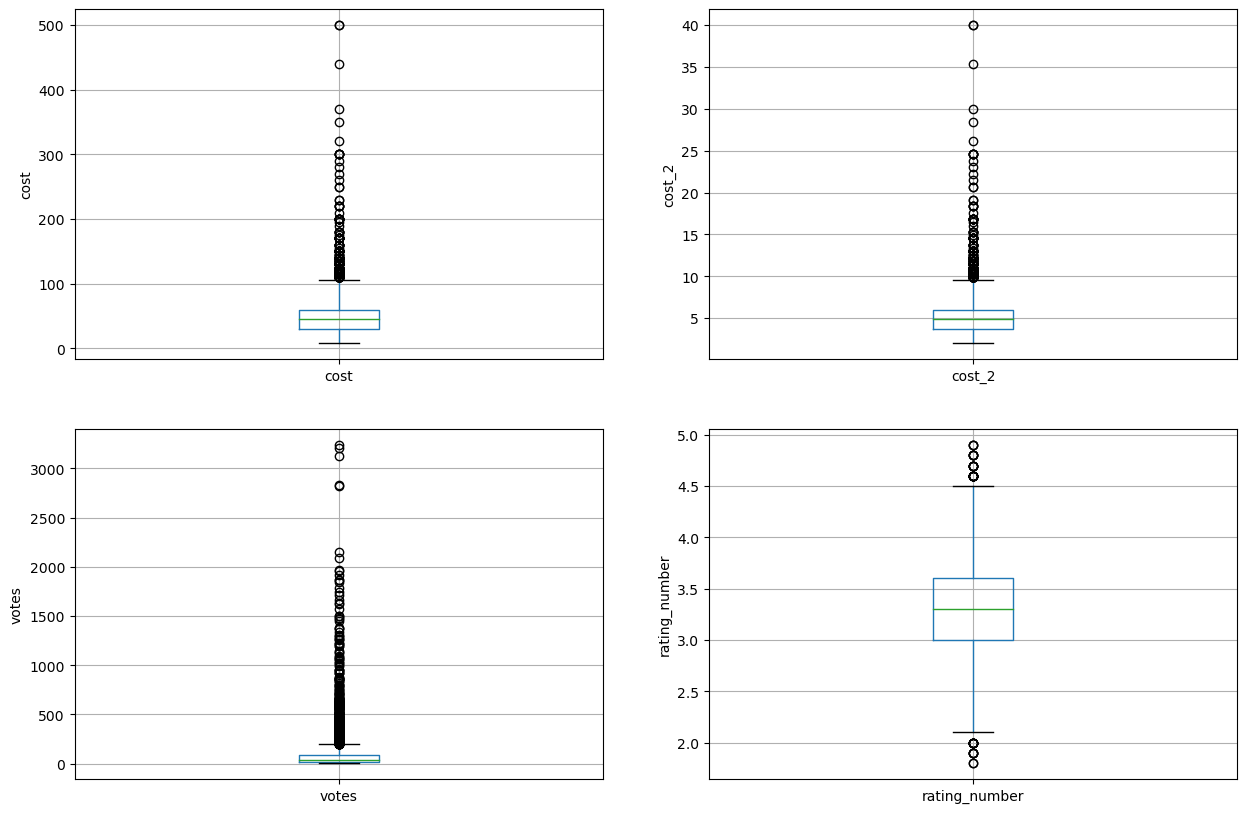

In [55]:
# Let's draw boxplots to visualise outliers in these variables
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
fig = df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('cost')

plt.subplot(2,2,2)
fig = df.boxplot(column= 'cost_2')
fig.set_title('')
fig.set_ylabel('cost_2')


plt.subplot(2,2,3)
fig = df.boxplot(column= 'votes')
fig.set_title('')
fig.set_ylabel('votes')

plt.subplot(2,2,4)
fig = df.boxplot(column= 'rating_number')
fig.set_title('')
fig.set_ylabel('rating_number')


In [56]:
# Find aoutliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [57]:
_,_,_ = find_outliers('cost')

cost outliers are values < -60.0 or > 150.0


In [58]:
_,_,_ = find_outliers('cost_2')

cost_2 outliers are values < -3.252032521 or > 12.967479676


In [59]:
_,_,_ = find_outliers('votes')

votes outliers are values < -213.0 or > 312.0


#### I.1 Data cleaning for Numerical features

If the percentage of missing value is big, we better treat with imputation rather than drop. Lets treat missing number before check corr
Impute the missing values with the median values -- median is robust with the outliers


In [60]:
df_num = df[numericals].copy()

In [61]:
for column in df_num.columns:
    df_num[column].fillna(df_num[column].median(), inplace=True)

In [62]:
#df_num.dropna(inplace=True)

In [63]:
df_num.isnull().sum()

cost             0
lat              0
lng              0
rating_number    0
votes            0
groupon          0
cost_2           0
dtype: int64

In [64]:
# Calculate correlation matrix
correlation_matrix = df_num.corr()

# Correlation with target variable
print(correlation_matrix['rating_number'])


cost             0.199215
lat             -0.008225
lng              0.009347
rating_number    1.000000
votes            0.524073
groupon         -0.002924
cost_2           0.199215
Name: rating_number, dtype: float64


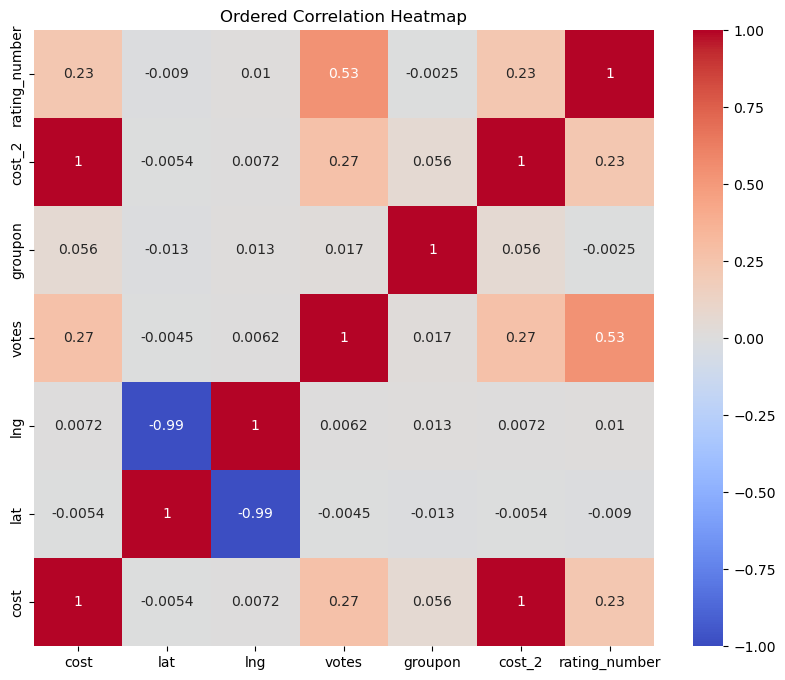

In [65]:
# Ensure 'rating_number' is the last column in the dataframe
ordered_cols = [col for col in df_num.columns if col != 'rating_number'] + ['rating_number']
df_ordered = df[ordered_cols]

# Calculate correlation matrix for the ordered dataframe
correlation_matrix_ordered = df_ordered.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ordered, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Ordered Correlation Heatmap")

# Reverse the y-axis for opposite order
plt.gca().invert_yaxis()

plt.show()


#### from correlation, we can tell cost, cost_2, votes are good candidate feature to select. but we also want to inlcude groupon to see if it is related

#### I.2 Encoding the categorical features

In [66]:
# creating instance of labelencoder
encoder = OneHotEncoder() #from sci-kit learn library

# Assign numerical values and storing in another column
df_encoded = encoder.fit_transform(df_cat[['type']].values).toarray()

In [67]:
df_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['type']))

In [68]:
df_encoded_df

type_['Bakery', 'Café']  type_['Bakery', 'Casual Dining']  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   
...                        ...                               ...   
10495                      0.0                               0.0   
10496                      0.0                               0.0   
10497                      0.0                               0.0   
10498                      0.0                               0.0   
10499                      0.0                               0.0   

       type_['Bakery', 'Dessert Parlour']  type_['Bakery', 'Food Court']  \
0                                     0.0                            0.0   
1                                     0.0                            0.0   
2                                     0.0                            0.0   
3                                     0.0                            0.0   
4                                     0.0                            0.0   
...                                   ...                            ...   
10495                                 0.0                            0.0   
10496                                 0.0                            0.0   
10497                                 0.0                            0.0   
10498                                 0.0                            0.0   
10499                                 0.0                            0.0   

       type_['Bakery', 'Pub']  type_['Bakery']  type_['Bar', 'Café']  \
0                         0.0              0.0                   0.0   
1                         0.0              0.0                   0.0   
2                         0.0              0.0                   0.0   
3                         0.0              0.0                   0.0   
4                         0.0              0.0                   0.0   
...                       ...              ...                   ...   
10495                     0.0              0.0                   0.0   
10496                     0.0              0.0                   0.0   
10497                     0.0              0.0                   0.0   
10498                     0.0              0.0                   0.0   
10499                     0.0              0.0                   0.0   

       type_['Bar', 'Casual Dining']  type_['Bar', 'Club']  \
0                                0.0                   0.0   
1                                0.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   
...                              ...                   ...   
10495                            0.0                   0.0   
10496                            0.0                   0.0   
10497                            0.0                   0.0   
10498                            0.0                   0.0   
10499                            0.0                   0.0   

       type_['Bar', 'Fine Dining']  ...  type_['Food Court']  \
0                              0.0  ...                  0.0   
1                              0.0  ...                  0.0   
2                              0.0  ...                  0.0   
3                              0.0  ...                  0.0   
4                              0.0  ...                  0.0   
...                            ...  ...                  ...   
10495                          0.0  ...                  0.0   
10496                          0.0  ...                  0.0   
10497                          0.0  ...                  1.0   
10498                      

#### I.2 encoding the numerical feature groupon

In [69]:
# Use get_dummies to one-hot encode the groupon column
groupon_encoded = pd.get_dummies(df_num['groupon'], prefix='groupon', prefix_sep='_')

# Drop the original groupon column from df_num
df_num = df_num.drop('groupon', axis=1)

# Concatenate the encoded dataframe with the original df_num
df_num = pd.concat([df_num, groupon_encoded], axis=1)


In [70]:
df_num

cost        lat         lng  rating_number   votes     cost_2  \
0       50.0 -33.876059  151.207605            4.0  1311.0   5.243902   
1       80.0 -33.910999  151.193793            4.6  3236.0   7.560976   
2      120.0 -33.867971  151.195210            4.9  1227.0  10.650407   
3      270.0 -33.856784  151.215297            4.9   278.0  22.235772   
4       55.0 -33.879035  151.206409            4.5  2150.0   5.630081   
...      ...        ...         ...            ...     ...        ...   
10495   40.0 -33.808653  150.972147            3.3    32.0   4.471545   
10496   20.0 -33.922147  151.078400            3.3    32.0   2.926829   
10497   20.0 -33.726993  150.725143            3.3    32.0   2.926829   
10498   15.0 -33.766770  150.769962            3.3    32.0   2.540650   
10499   60.0 -33.872741  151.172468            3.3    32.0   6.016260   

       groupon_False  groupon_True  
0                  1             0  
1                  1             0  
2                  1             0  
3                  1             0  
4                  1             0  
...              ...           ...  
10495              1             0  
10496              1             0  
10497              1             0  
10498              1             0  
10499              1             0  

[10500 rows x 8 columns]

### II. Regression:
3. Build a linear regression model (model_regression_1) to predict the restaurants rating (numeric rating) from other features (columns) in the dataset. Please consider splitting the data into train (80%) and test (20%) sets.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “ while splitting]
4. Build another linear regression model (model_regression_2) with using the Gradient Descent as the optimisation function.
5. Report the mean square error (MSE) on the test data for both models.



#### 3. Build a linear regression model (model_regression_1) to predict the restaurants rating (numeric rating) from other features (columns) in the dataset. Please consider splitting the data into train (80%) and test (20%) sets.

Based on previous heatmap, uniform the selected features for a better performance

In [71]:
scaler = MinMaxScaler()
df_num[['cost2','cost','rating_number','votes']] = scaler.fit_transform(df_num[['cost_2','cost','rating_number','votes']])


In [72]:
df_num.head()

cost        lat         lng  rating_number     votes     cost_2  \
0  0.085366 -33.876059  151.207605       0.709677  0.404394   5.243902   
1  0.146341 -33.910999  151.193793       0.903226  1.000000   7.560976   
2  0.227642 -33.867971  151.195210       1.000000  0.378403  10.650407   
3  0.532520 -33.856784  151.215297       1.000000  0.084777  22.235772   
4  0.095528 -33.879035  151.206409       0.870968  0.663985   5.630081   

   groupon_False  groupon_True     cost2  
0              1             0  0.085366  
1              1             0  0.146341  
2              1             0  0.227642  
3              1             0  0.532520  
4              1             0  0.095528

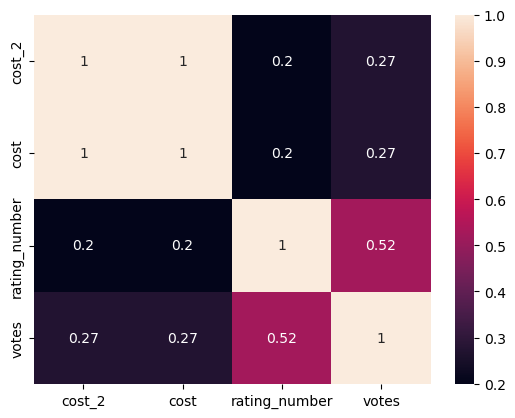

In [73]:
# heatmap to show correlation

sns.heatmap(df_num.loc[:, ['cost_2','cost','rating_number','votes']].corr(), annot=True)
plt.show()

#### Split data into separate training and test set 

In [74]:
X = df_num.drop(['rating_number'], axis=1)
y = df_num['rating_number']

In [75]:
# split X and y into training and testing sets, set random_state = 0 as suggested.
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8400, 8) (8400,)
(2100, 8) (2100,)


In [76]:
# Train a linear regression model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predict on the test set
y_pred_model1 = model_regression_1.predict(X_test)

#### 5. Report the mean square error (MSE) on the test data for both models. Model 1

In [78]:
# Evaluate the predictions
mse = mean_squared_error(y_test, y_pred_model1)
r2 = r2_score(y_test, y_pred_model1)

print('Model 1 Mean Squared Error:', mse)
print('Model 1 R Square:', r2)

Model 1 Mean Squared Error: 0.00962822003433489
Model 1 R Square: 0.2871882422957792



#### Lets test out to exclude the features with lower corr from previous steps

In [79]:
# Declare source and target variables

X_compare = df_num[['cost_2', 'cost', 'votes']]
y_compare = df_num.rating_number

# Split X and y into training and testing datasets

X_compare_train,X_compare_test,y_compare_train,y_compare_test=train_test_split(X_compare,y_compare,test_size=0.2,random_state=0,shuffle=True)

In [80]:
# instantiate the model
model_compare = LinearRegression()

# fit the model
model_compare.fit(X_compare_train, y_compare_train)

LinearRegression()

In [81]:
y_compare_pred = model_compare.predict(X_compare_test)

In [82]:
# Evaluate the predictions
mse_compare = mean_squared_error(y_compare_test, y_compare_pred)
r2_compare = r2_score(y_compare_test, y_compare_pred)

print('Model 1 compare model Mean Squared Error:', mse_compare, 'which is ', mse_compare - mse, 'higher than inlcude all features')
print('Model 1 compare model R Square:', r2_compare, 'which is ', r2 - r2_compare, 'lower than include all features')

Model 1 compare model Mean Squared Error: 0.00963666250414712 which is  8.442469812229916e-06 higher than inlcude all features
Model 1 compare model R Square: 0.28656321589165046 which is  0.000625026404128759 lower than include all features


#### MSE lower the better, R2 higher the better. 
#### For Model 1, from the compare, we have found to inlcude or exclude the fields that having lower corr score does not make much impact, but inlcude the features with lower corr do improve the model slightly. 

In [83]:
print('Model 1 Mean Squared Error:', mse)
print('Model 1 R Square:', r2)

Model 1 Mean Squared Error: 0.00962822003433489
Model 1 R Square: 0.2871882422957792


#### 4. Build another linear regression model (model_regression_2) with using the Gradient Descent as the optimisation function.

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# base on https://github.com/ibrahim-radwan/DSTS/blob/main/LR_GD_python.ipynb
# however our dataset has multiple features, update code as below

class GradientDescentLinearRegressionV2:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, y):
        # in original LR_GD code, there were only theta_0 and theta_1: y= theta_1x + theta_0
        # Adding a column for the intercept term, it becomes: y = theta_0+theta_1x1 + theta_2x2 + ... theta_nxn.
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Initialize weights to zeros
        self.theta = np.zeros(X.shape[1])
        
        # Gradient Descent
        for _ in range(self.iterations):
            # Compute the hypothesis
            hypothesis = np.dot(X, self.theta)
            
            # Compute the error
            error = hypothesis - y
            
            # Update the weights
            gradient = np.dot(X.T, error) / X.shape[0]
            self.theta -= self.learning_rate * gradient
    
    def predict(self, X):
        # Adding a column for the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        return np.dot(X, self.theta)


In [86]:
model_regression_2 = GradientDescentLinearRegressionV2(learning_rate=0.001, iterations=10000)

# Fit the model to the training data
model_regression_2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_model2 = model_regression_2.predict(X_test_scaled)

# Compute the Mean Squared Error
mse = np.mean((y_test - y_pred_model2)**2)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.00959745315067206


In [87]:
def r2_score(y_test, y_pred):
    ss_res = np.sum((y_test - y_pred)**2)
    ss_tot = np.sum((y_test - y_test.mean())**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [88]:
# Evaluate model 2
mse_model2 = np.mean((y_test - y_pred_model2)**2, axis=0)
print("Mean Squared Error for model 2:", mse)
# Calculate the R^2 score for the model2
r2_model2 = r2_score(y_test, y_pred_model2)
print("R2 Score for model 2", r2_model2)

Mean Squared Error for model 2: 0.00959745315067206
R2 Score for model 2 0.2894660253485736


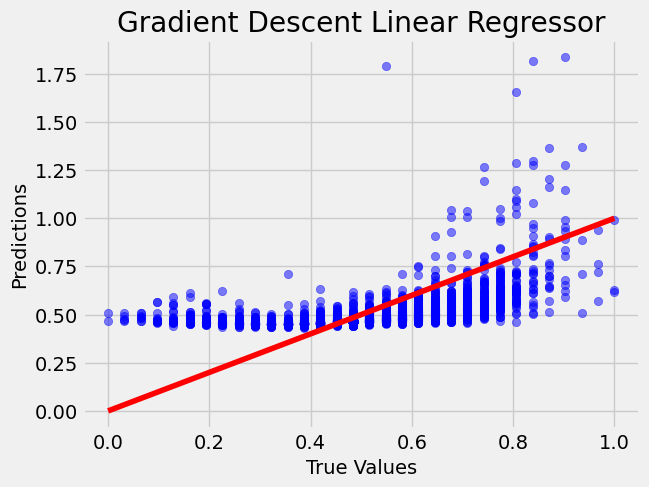

In [89]:
# Predict on the same training data
predicted = model_regression_2.predict(X_train_scaled)

# Plot true vs. predicted values
plt.style.use('fivethirtyeight')
plt.scatter(y_train, predicted, color='blue', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.gca().set_title("Gradient Descent Linear Regressor")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Diagonal line for reference


#### 5. Report the mean square error (MSE) on the test data for both models.

In [90]:
print('Model 1 Mean Squared Error on the test data:', mean_squared_error(y_test,y_pred_model1))
print('Model 2 Mean Squared Error on the test data:', mean_squared_error(y_test,y_pred_model2))

Model 1 Mean Squared Error on the test data: 0.00962822003433489
Model 2 Mean Squared Error on the test data: 0.00959745315067206


#### Based on the MSE, the model 2 has slightly lower MSE than Model 1, therefore Model 2 is better in terms of its prediction for the rating_number with less error. However the difference is so small and it could be ignored in real situation. 

### III. Classification:
6. Simplify the problem into binary classifications where class 1 contains ‘Poor’ and ‘Average’ records while class 2 contains ‘Good’, ‘Very Good’ and ‘Excellent’ records.
7. Build a logistic regression model (model_classification_3) for the simplified data, where training data is 80% and the test data is 20%.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “ while splitting]
8. Use the confusion matrix to report the results of using the classification model on the test data.
9. Draw your conclusions and observations about the performance of the model relevant to the classes’ distributions.
Bonus: Repeat the previous classification task using three other models of your choice (example suggestions here (on Scikit-Learn website) and report the performance.

#### Because I have took a copy of dataset when doing data cleaning, there might still be empty value in the df
#### this needs to be treated before classficiation.

In [91]:
#  check if rating_text colum has null value        
df.isnull().sum().sort_values(ascending=False)

rating_text      3316
rating_number    3316
votes            3316
cost_2            346
cost              346
lat               192
lng               192
type               48
color               0
groupon             0
address             0
title               0
subzone             0
phone               0
link                0
cuisine             0
cuisine_color       0
dtype: int64

In [92]:
# Fill categorical columns with most frequent value
for col in categorical:
    most_frequent = df[col].value_counts().idxmax()
    df[col].fillna(most_frequent, inplace=True)

# Fill numerical columns with median
for col in numericals:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

In [93]:
df.isnull().sum().sort_values(ascending=False)

address          0
subzone          0
cost_2           0
color            0
groupon          0
votes            0
type             0
title            0
rating_text      0
cost             0
rating_number    0
phone            0
lng              0
link             0
lat              0
cuisine          0
cuisine_color    0
dtype: int64

In [94]:
def classify_text_ratings(rating_text):
    if rating_text in ['Poor', 'Average']:
        return 1  # Class 1
    else:
        return 2  # Class 2

# Apply the function to transform the rating_text column
df['rating_class'] = df['rating_text'].apply(classify_text_ratings)

# Check the transformation
print(df['rating_class'].value_counts())


1    8026
2    2474
Name: rating_class, dtype: int64


In [95]:
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  \
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4   
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b   

   rating_class  
0             2  
1             2  
2             2  
3             2  
4             2

In [96]:
# re-arrange the columns, put rating class next to rating text
cols = df.columns.tolist()
cols.insert(cols.index('rating_text') + 1, cols.pop(cols.index('rating_class')))
df = df[cols]

In [97]:
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  rating_class  \
0  02 8318 0406            4.0   Very Good             2   
1  02 9699 2225            4.6   Excellent             2   
2  1800 700 700            4.9   Excellent             2   
3  02 9240 8000            4.9   Excellent             2   
4  02 8317 4811            4.5   Excellent             2   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

#### 7. Build a logistic regression model (model_classification_3) for the simplified data, where training data is 80% and the test data is 20%.
[Hint: please use sklearn.model_selection.train_test_split and set random_state=0 “ while splitting]

In [98]:
# Target feature, and the rating text that is source of rating class, and other non-numerical features
columns_to_drop = [ 'address', 'cuisine','link', 'phone', 'rating_text','rating_class', 'subzone', 'title', 'type', 'color', 'cuisine_color']

X_model3 = df.drop(columns=columns_to_drop)

y_model3 = df['rating_class']

In [99]:
# Split the data into training and test sets , where training data is 80% and the test data is 20%.
X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(X_model3, y_model3, test_size=0.20, random_state=0)

# Build a logistic regression model
model_classification_3 = LogisticRegression(max_iter=10000)  # Increase max_iter if needed
model_classification_3.fit(X_train_model3, y_train_model3)

# Evaluate the model
y_pred_model3 = model_classification_3.predict(X_test_model3)
accuracy = accuracy_score(y_test_model3, y_pred_model3)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_model3, y_pred_model3))


Accuracy: 0.9990476190476191
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1631
           2       1.00      1.00      1.00       469

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



#### 8. Use the confusion matrix to report the results of using the classification model on the test data.

In [100]:
cm = confusion_matrix(y_test_model3, y_pred_model3)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1629    2]
 [   0  469]]


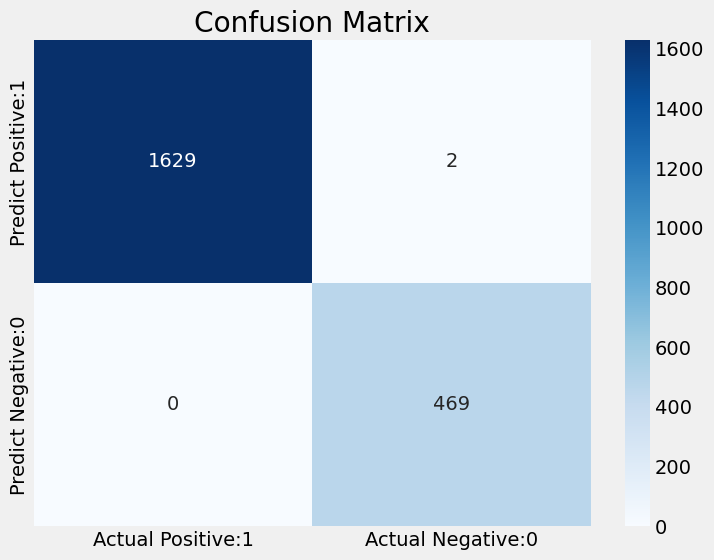

In [101]:
# Convert confusion matrix into a DataFrame
df_cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#### 9. Draw your conclusions and observations about the performance of the model relevant to the classes’ distributions.

##### Summary:
1. Accuracy: 0.9990476190476191 (99.9%) for model3 is very impressive accuracy. But it brings concern if it is overfitting?
2. Precision, recall and F1
   For Class1 and Class2, both Precision and recall has been 100% means all the predicted and acutal instances for both calss has been correctly predicted by the model. 
3. Confusion Matrix:

   TP: 1629 FN: 2
   
   FN: 0    TN: 469

##### In Conslusion
* The model performs very well on testing set.
* The accuracy is too good, raise concerns of overfitting
* The class is imbalanced, Class 1 > class2 but seems does not impact performance class 2, recall for class 2 also high. 
* FP is only 2 and FN is 0, means the model makes very little mistakes
* We should consider validation using like cross-validation. 

#### Bonus: Repeat the previous classification task using three other models of your choice (example suggestions here (on Scikit-Learn website) and report the performance

In [102]:
# Splitting your dataset
X_train_extended, X_test_extended, y_train_extended, y_test_extended = train_test_split(X_model3, y_model3, test_size=0.2, random_state=0)


#### Nearest Neighbors

Model: Nearest Neighbors
Accuracy: 0.909047619047619
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      1631
           2       0.79      0.80      0.80       469

    accuracy                           0.91      2100
   macro avg       0.87      0.87      0.87      2100
weighted avg       0.91      0.91      0.91      2100



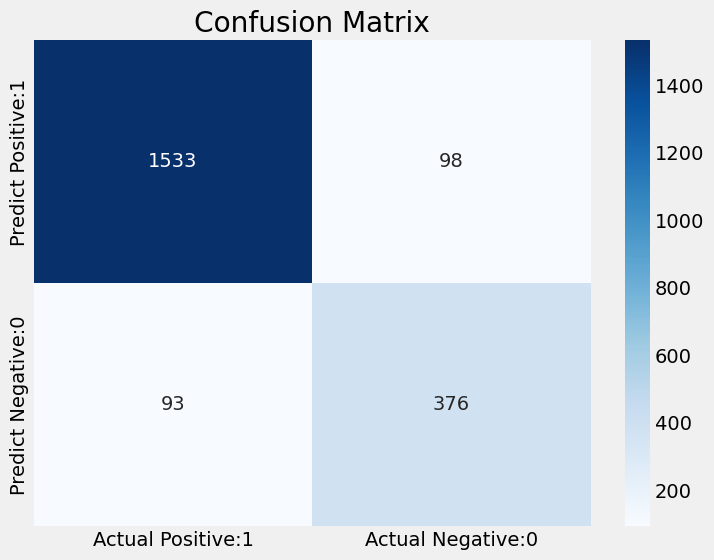

In [103]:
model_knn = KNeighborsClassifier(3)
model_knn.fit(X_train_extended, y_train_extended)

# Predict on the test set
y_pred_extended_knn = model_knn.predict(X_test_extended)

# Evaluate the model
print("Model: Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test_extended, y_pred_extended_knn))
print("Classification Report:")
print(classification_report(y_test_extended, y_pred_extended_knn))

# Display confusion matrix
cm_knn = confusion_matrix(y_test_extended, y_pred_extended_knn)

# Convert confusion matrix into a DataFrame
df_cm = pd.DataFrame(data=cm_knn, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


#### Decision Tree

Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1631
           2       1.00      1.00      1.00       469

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100



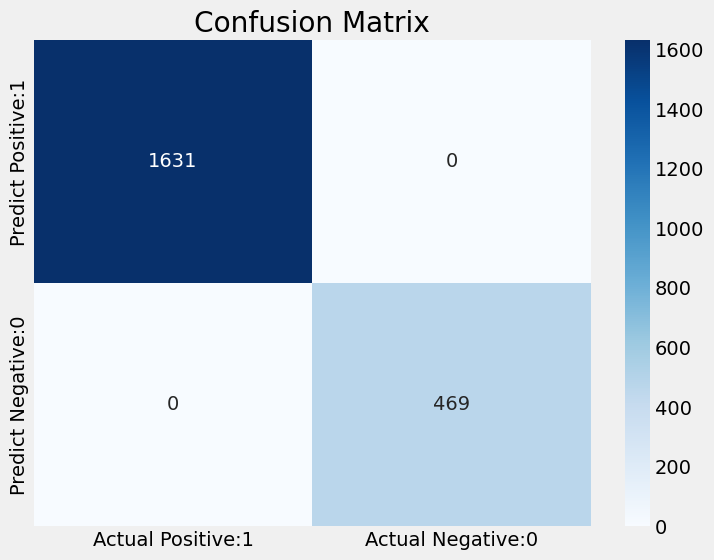

In [104]:
# Train the classifier
model_dt = DecisionTreeClassifier(max_depth=5, random_state=0)
model_dt.fit(X_train_extended, y_train_extended)

y_pred_extended_dt = model_dt.predict(X_test_extended)

# Evaluate the model
print("Model: Decision Tree")
print("Accuracy:", accuracy_score(y_test_extended, y_pred_extended_dt))
print("Classification Report:")
print(classification_report(y_test_extended, y_pred_extended_dt))

# Display confusion matrix
cm_dt = confusion_matrix(y_test_extended, y_pred_extended_dt)
# Convert confusion matrix into a DataFrame
df_cm = pd.DataFrame(data=cm_dt, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


#### Random Forest

Model: Random Forest
Accuracy: 0.979047619047619
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1631
           2       0.99      0.91      0.95       469

    accuracy                           0.98      2100
   macro avg       0.98      0.96      0.97      2100
weighted avg       0.98      0.98      0.98      2100



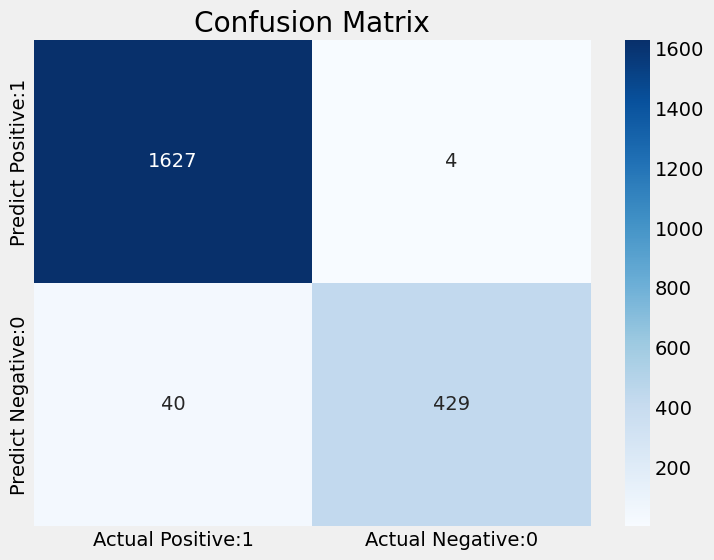

In [105]:
model_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0)
model_rf.fit(X_train_extended, y_train_extended)

# Predict 
y_pred_extended_rf = model_rf.predict(X_test_extended)

# Evaluate the model
print("Model: Random Forest")
print("Accuracy:", accuracy_score(y_test_extended, y_pred_extended_rf))
print("Classification Report:")
print(classification_report(y_test_extended, y_pred_extended_rf))

# Display confusion matrix
cm_rf = confusion_matrix(y_test_extended, y_pred_extended_rf)
# Convert confusion matrix into a DataFrame
df_cm = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()